# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Top 3 Metaverse Crypto Coins Gaining The Most Price Today (NTVRK, MTS, SHOE).  This week, Crypto markets continue to trade sideways, with Bitcoin and Ethereum managing to hold support. Today we take a look at the top three Metaverse crypto coins gaining the most price, ordered by 24-hour growth, lowest to highest. Netvrk (NTVRK) +32% Launching in May 2021, Netvrk describes itself as a multichain Metaverse platform with [&#8230;]The post Top 3 Metaverse Crypto Coins Gaining The Most Price Today (NTVRK, MTS, SHOE) appeared first on NullTX. ... [| Skaityti daugiau](https://nulltx.com/top-3-metaverse-crypto-coins-gaining-the-most-price-today/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- NDP's Jagmeet Singh denounces trucker convoy, disagrees with brother-in-law's donation to the cause | CBC News.  NDP Leader Jagmeet Singh today condemned a convoy of truckers and others travelling to Ottawa to protest a federal mandate requiring all cross-border drivers to get their COVID-19 shots. He said some of the people behind the demonstration are pushing "false i… ... [| Skaityti daugiau](http://www.cbc.ca/news/politics/singh-trucker-convoy-brother-in-law-1.6328689) 

### Kainų kaita pandemijos metu

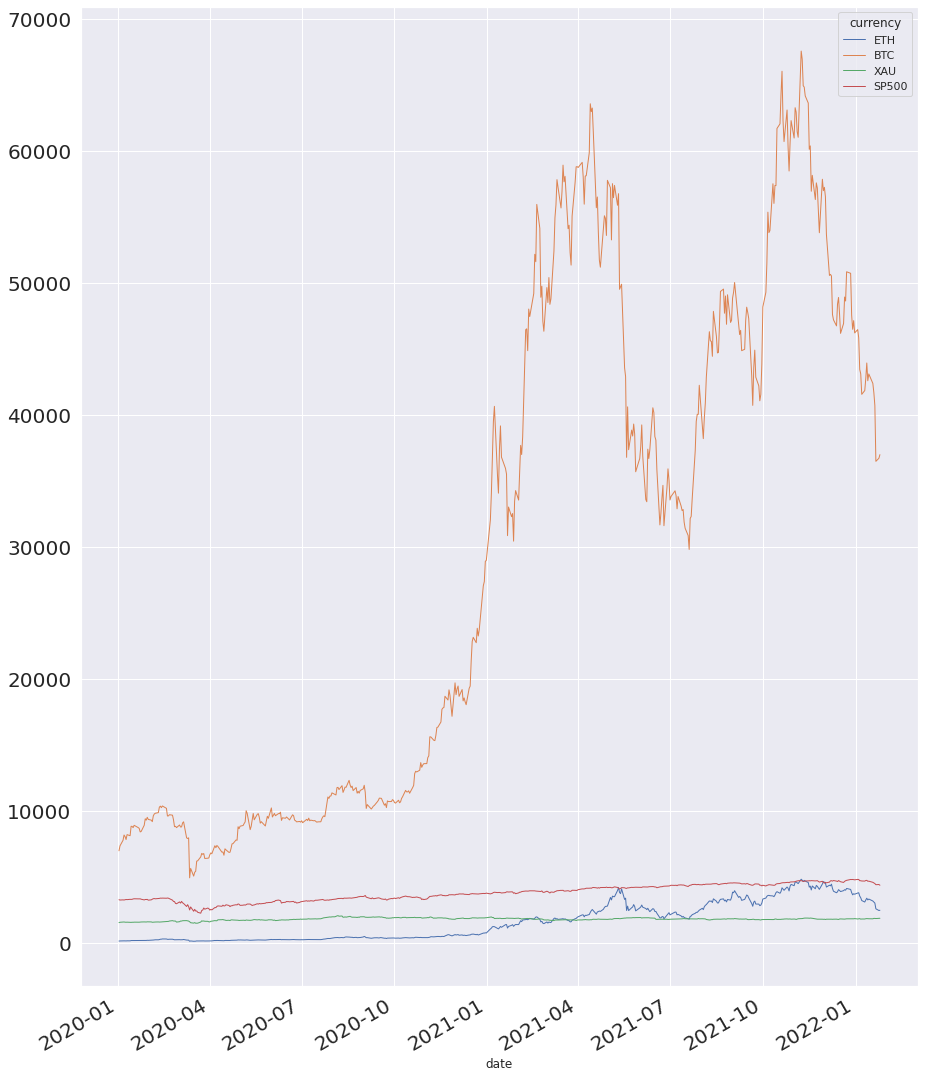

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.903231,0.155763,0.917737
BTC,0.903231,1.000000,0.137497,0.873674
XAU,0.155763,0.137497,1.000000,0.302233
SP500,0.917737,0.873674,0.302233,1.000000


In [8]:
#hide ### Koreliacijos matrica.

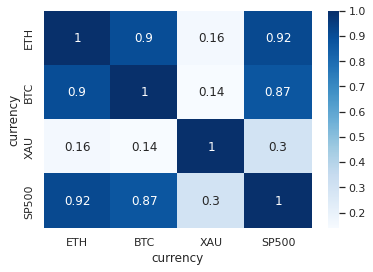

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')